# Ill-posedness: The inverse heat equation

## 1D Inverse Heat Equation

The classic example of ill-posedness is the inverse heat equation. Specifically, we consider a rod of length $L$, and let $u(x,t)$ denote the temperature of the rod at point $x$ and time $t$. 
We are interested in inferring the initial temperature field $m(x) := u(x, 0)$ given noisy observations $d$ of the temperature field at a later time $T$, $u(x,T)$. 

### Forward problem

Given
- the initial temperature $u(x,0) = m(x)$,
- the thermal diffusivity $k$,
- the boundary conditions in the form of a prescribed temperature $u(0,t) = u(L,t) = 0$ at the ends of the rod,

solve the heat equation

$$
\left\{
\begin{array}{ll}
\frac{\partial u}{\partial t} - k \frac{\partial^2}{\partial x^2} u = 0 & \forall x\,\in\,(0, L),\;  \forall t \in (0,T)\\
u(x, 0) = m(x) & \forall x \in [0,L] \\
u(0,t) = u(L,t) = 0 & \forall t \in (0, T],
\end{array}
\right.
$$

and observe the temperature at the final time $T$. Thus $\mathcal{F}(m)$ is the parameter-to-observable map given by

$$ \mathcal{F}(m) := u(x, T). $$

#### Analytical solution to the forward problem
Verify that if

$$ m(x) = \sin\left(i \pi \frac{x}{L}  \right), \quad i = 1,2,3, \ldots ,$$

then

$$ u(x,t) = e^{ -k t \left(i \pi /L \right)^2 } \sin\left(i \pi \frac{x}{L} \right) $$

is the unique solution to the heat equation. Thus, the $i$th mode of the initial condition decays like $e^{ -k t \left(i \pi / L \right)^2 }$ in time. 

### Inverse problem

Given the parameter-to-obsrvable map $\mathcal{F}$ and a noisy observation $d$ of the temperature field at time $T$, find the initial temperature field $m$ such that

$$ \mathcal{F}(m) = d. $$

### Ill-posedness of the inverse problem

Consider a perturbation

$$ \delta m(x) = \varepsilon \sin\left(i \pi \frac{x}{L} \right), $$

where $\varepsilon > 0$ and $i = 1, 2, 3, \ldots$.

Then, by linearity of $\mathcal{F}$, the corresponding perturbation $\delta d(x) = \mathcal{F}(m + \delta m) - \mathcal{F}(m)$ is

$$ \delta d(x) = \varepsilon\, e^{ -k T \left(i \pi /L \right)^2 } \sin\left(i \pi \frac{x}{L} \right),$$

which converges to zero as $i \rightarrow +\infty$.

Hence the ratio of $\delta m$ to $\delta d$ can become arbitrary large (in the higher modes), which shows that the stability requirement for well-posedness cannot be satisfied. Another way of saying this is that two initial conditions that differ by a large amount cannot be distinguished from the data. 

### Discretization

To discretize the problem, we use finite differences in space and implicit Euler in time.

#### Semidiscretization in space
We divide the $[0, L]$ interval into $n_x$ subintervals of the same length $h = \frac{L}{n_x}$, and we denote with $u_j(t) := u( jh, t)$ the value of the temperature at point $x_j = jh$ and time $t$.

We then use a centered finite difference approximation of the second derivative in space and write

$$ \frac{\partial u_j(t)}{\partial t} - k \frac{u_{j-1}(t) - 2u_j(t) + u_{j+1}(t)}{h^2} \quad \text{for } j=1,2,\ldots,n_x-1,$$

with the boundary condition $u_0(t) = u_{n_x}(t) = 0$.

We let $n = n_x-1$ be the number of discretization points in the interior of the interval $[0, L]$, and let 

$$ \mathbf{u}(t) := \begin{bmatrix}u_1(t)\\u_2(t)\\ \ldots\\ u_{n_x-1}(t) \end{bmatrix} \in \mathbb{R}^n $$

be the vector collecting the values of the discretized temperature $u(x,t)$ at the points $x_j = j\,h$ with $j=1,\ldots,n_x-1$.

We then write the system of ordinary differential equations (ODEs):
$$ \frac{\partial}{\partial t} \mathbf{u}(t) + K \mathbf{u}(t) = 0,$$
where $K \in \mathbb{R}^{n \times n}$ is the tridiagonal matrix given by

$$ K = \frac{k}{h^2}\begin{bmatrix}  2 & -1 &       &        &        &    \\
                                    -1 &  2 & -1    &        &        &    \\
                                       & -1 &  2    & -1     &        &    \\
                                       &    &\ldots & \ldots & \ldots &    \\
                                       &    &       & -1     &     2  & -1 \\ 
                                       &    &       &        &     -1 & 2  \\
                     \end{bmatrix}.$$
                     
#### Time discretization
We subdivide the time interval $(0, T]$ in $n_t$ time step of size $\Delta t = \frac{T}{n_t}$.
By letting $\mathbf{u}^{(i)} = \mathbf{u}(i\,\Delta t)$ denote the discretized temperature profile at time $t_i = i\,\Delta t$, the implicit Euler scheme reads

$$ \frac{\mathbf{u}^{(i+1)} - \mathbf{u}^{(i)}}{\Delta t} + K\mathbf{u}^{(i+1)} = 0, \quad \text{for } i=0,1,\ldots, n_t-1.$$

After simple algebraic manipulations and exploiting the initial condition $u(x,0) = m(x)$, we then obtain

$$
\left\{
\begin{array}
\mathbf{u}^{(0)} = \mathbf{m} \\
\mathbf{u}^{(i+1)} = \left( I + \Delta t\, K\right)^{-1} \mathbf{u}^{(i)},
\end{array}
\right.
$$

where $\mathbf{m} \in \mathbb{R}^n$ is the vector whose components represent the discretized initial condition at each grid point. This means that the relationship between the temperature at time step $i$ and the initial temperature is given by

$$ \mathbf{u}^{(i)} = \left( I + \Delta t\, K\right)^{-i} \mathbf{m}.$$

In the code below, the function `assembleMatrix` generates the finite difference matrix $\left( I + \Delta t\, K \right)$ and the function `solveFwd` evaluates the discrete parameter-to-observable map $F$ given by

$$ F\, \mathbf{m} := \left( I + \Delta t\, K\right)^{-n_t}\, \mathbf{m}. $$

In [2]:
from __future__ import print_function, absolute_import, division

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

# the following suppresses warnings (which we're getting due to non-CSR format for stiffness matrix)
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

def plot(f, style, **kwargs):
    x = np.linspace(0., L, nx+1)
    f_plot = np.zeros_like(x)
    f_plot[1:-1] = f
    plt.plot(x,f_plot, style, **kwargs)
    
def assembleMatrix(k, h, dt, n):
    """
    The function assembles the matrix (I + \delta_t K)
    Here:
    - k is the thermal diffusivity coefficient
    - h is the spacial discretization size
    - dt is the temporal discretization size
    - n is the number of subintervals
    """
    # To assemble matrix K, first create 3 diagonals
    # and then call scipy function `spdiags`,
    # which creates a sparse matrix given the diagonals
    diagonals = np.zeros((3, n))   # 3 diagonals
    diagonals[0,:] = -1.0/h**2
    diagonals[1,:] =  2.0/h**2
    diagonals[2,:] = -1.0/h**2
    K = k*sp.spdiags(diagonals, [-1,0,1], n,n)
    
    # M holds an identity matrix,
    # which is assembled similarly to K,
    # but by specifying only main diagonal of ones
    M = sp.spdiags(np.ones(n), 0, n,n)
    
    return M + dt*K
    

def solveFwd(m, k, h, dt, n, nt):
    """
    The function computes the temperature at the final time, u(T),
    for a given initial condition m.
    Here:
    - m is the initial condition
    - k is the thermal diffusivity coefficient
    - h is the spacial discretization size
    - dt is the temporal discretization size
    - n is the number of subintervals 
    - nt is the number of time steps
    """
    
    
    # Assemble the matrix (note, that it is
    # constant, so we can use it for all time steps)
    A = assembleMatrix(k, h, dt, n)
    
    # u_old holds the most recent known value of u
    u_old = m.copy()
    
    # solve the system for nt time steps
    for i in np.arange(nt):
        # scipy function `spsolve` solves 
        # sparse linear system
        u = la.spsolve(A, u_old)
        u_old[:] = u
        
    return u        

### A naive solution to the inverse problem

If $\mathcal{F}$ is invertible a naive solution to the inverse problem $\mathcal{F} m = d$ is simply to set

$$ m = \mathcal{F}^{-1} d. $$

The function `naiveSolveInv` computes the solution of the discretized inverse problem $\mathbf{m} = F^{-1} \mathbf{d}$ as

$$ \mathbf{m} = \left( I + \Delta t\,K\right)^{n_t} \mathbf{d}. $$

The code below shows that:
- for a very coarse mesh (`nx = 20`) and no data noise (`noise_std_dev = 0.0`) the naive solution is quite good
- for a finer mesh (`nx = 100`) and/or even small data noise (`noise_std_dev = 1e-4`) the naive solution is garbage

In [3]:
def naiveSolveInv(d, k, h, dt, n, nt):
    """
    Solves the inverse problem by applying 
    the matrix (I + \delta_t K) n_t times
    """
    A = assembleMatrix(k, h, dt, n)
    
    p_i = d.copy()
    for i in np.arange(nt):
        p = A*p_i
        p_i[:] = p
        
    return p

In [4]:
# physical parameters
T = 1.0
L = 1.0
k = 0.1

def showInvresionResults(nx, nt, noise_std_dev, T, L, k):
    # utility function to show inversion results
    
    
    h = L/float(nx)
    dt = T/float(nt)

    x = np.linspace(0.+h, L-h, nx-1) #place nx-1 equispace point in the interior of [0,L] interval
    m_true = 0.5 - np.abs(x-0.5)
    u_true = solveFwd(m_true, k, h, dt, nx-1, nt)

    d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])

    m = naiveSolveInv(d, k, h, dt, nx-1, nt)

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plot(m_true, "-.b", label = 'm_true')
    plot(m, "-r", label = 'm')
    plt.legend()
    plt.title("Initial temperature profile")
    plt.subplot(1,2,2)
    plot(u_true, "-b", label = 'u(T)')
    plot(d, "og", label = 'd')
    plt.legend()
    plt.title("Temperature solution at final time")
    plt.show()

__Very coarse mesh and no obsersvational data noise__

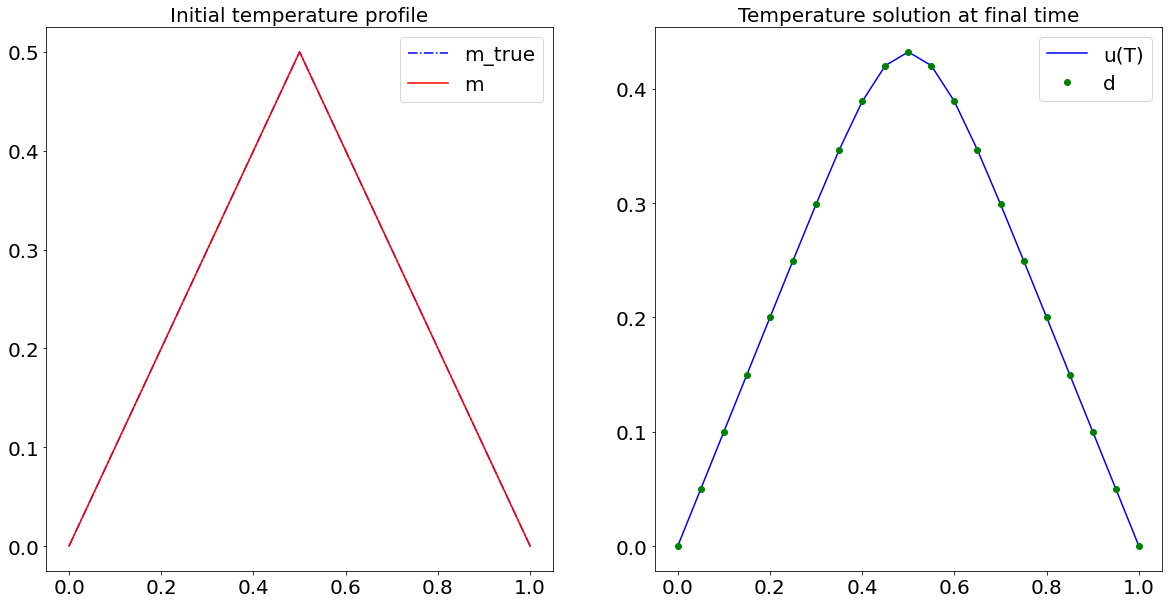

In [5]:
T = 4.0
L = 1.0
k = 0.001
nx = 20
nt = 20
noise_std_dev = 0.0000

showInvresionResults(nx, nt, noise_std_dev, T, L, k)

__Very coarse mesh and small data noise__

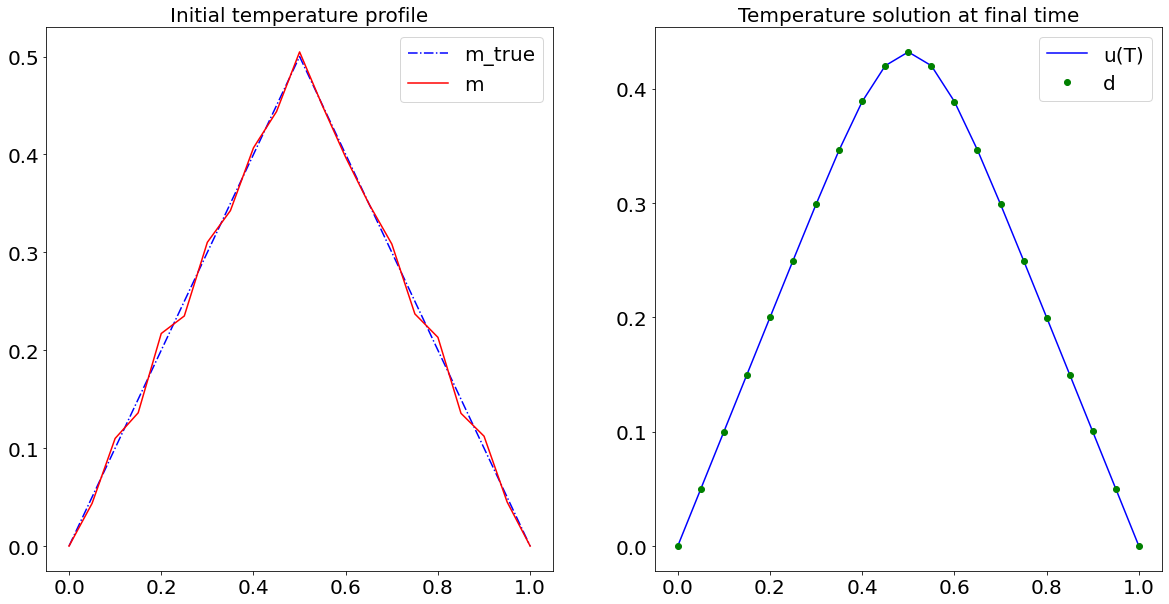

In [6]:
T = 4.0
L = 1.0
k = 0.001
nx = 20
nt = 20
noise_std_dev = 1.e-4

showInvresionResults(nx, nt, noise_std_dev, T, L, k)

__Fine mesh and no data noise__

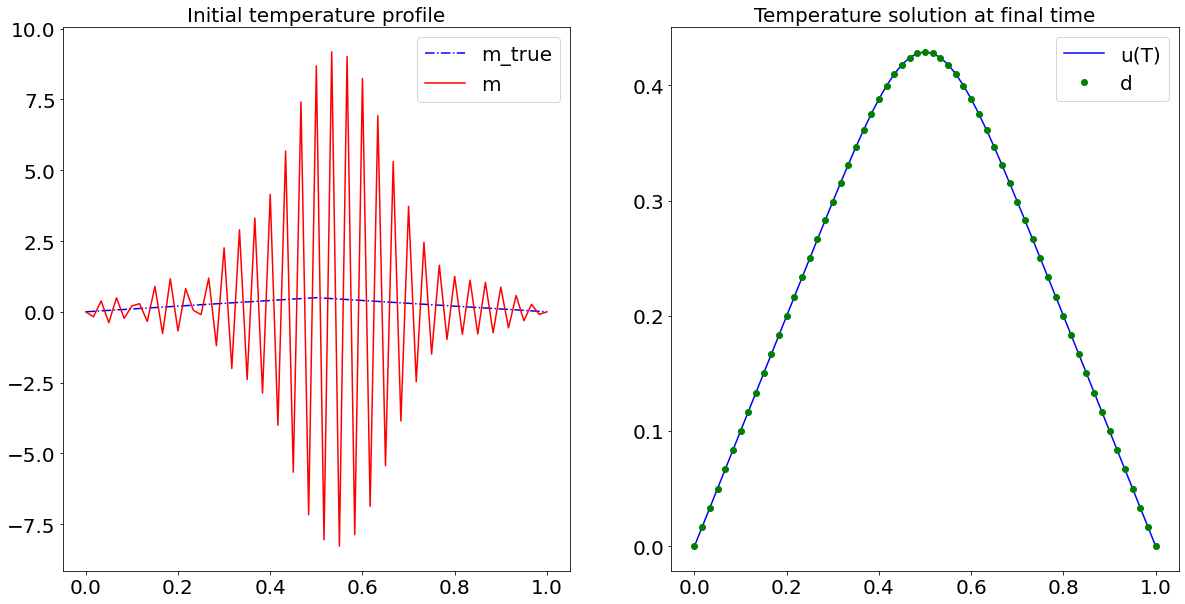

In [7]:
T = 4.0
L = 1.0
k = 0.001
nx = 60
nt = 60
noise_std_dev = 0.

showInvresionResults(nx, nt, noise_std_dev, T, L, k)

__Fine mesh and small data noise__

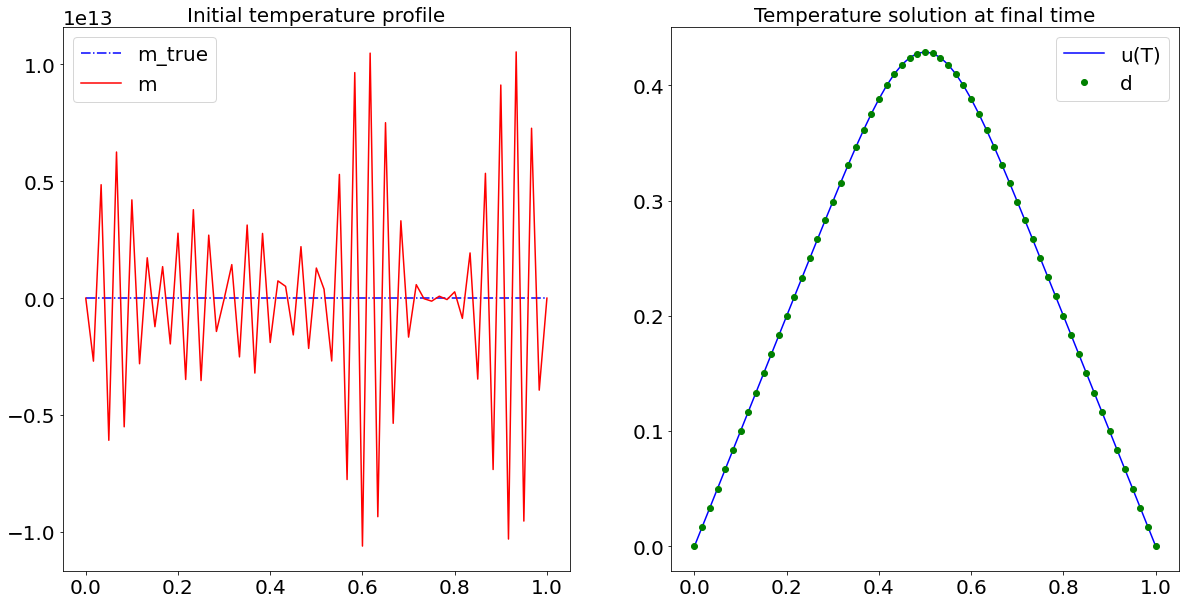

In [8]:
T = 4.0
L = 1.0
k = 0.001
nx = 60
nt = 60
noise_std_dev = 1.e-4

showInvresionResults(nx, nt, noise_std_dev, T, L, k)

### Why does the naive solution fail?

#### Spectral property of the parameter to observable map

Let $v_i = \sqrt{\frac{2}{L}} \sin\left( i \, \pi \frac{x}{L} \right)$ with $i=1,2,3, \ldots$, then we have that

$$ \mathcal{F} v_i = \lambda_i v_i, \quad \text{where the eigenvalues } \lambda_i = e^{-kT\left(i \pi/L \right)^2}. $$

**Note**:
- Large eigenvalues $\lambda_i$ corresponds to smooth eigenfunctions $v_i$;
- Small eigenvalues $\lambda_i$ corresponds to oscillatory eigenfuctions $v_i$.

The figure below shows that the eigenvalues $\lambda_i$ of the continuous parameter-to-observable map $\mathcal{F}$ decay extremely (exponentially) fast.

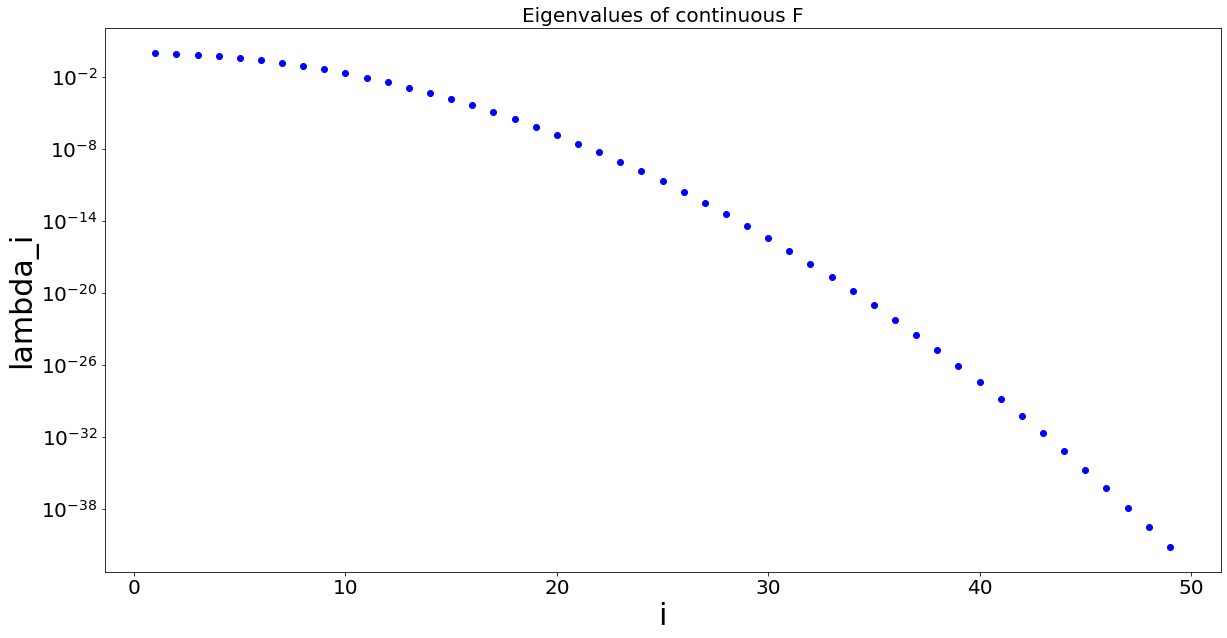

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T = 4.0
L = 1.0
k = 0.001

i = np.arange(1,50)
lambdas = np.exp(-k*T*np.power(np.pi/L*i,2))

plt.figure(figsize=(20,10))
plt.semilogy(i, lambdas, 'ob')
plt.xlabel('i')
plt.ylabel('lambda_i')
plt.title("Eigenvalues of continuous F")
plt.show()

  In a similar way, the figure below show the eigenvalues of the discrete parameter to observable map $F$: their fast decay means that $F$ is extremely ill conditioned.

In the code below we assemble the matrix $F$ column-by-column, by computing its actions on the canonical vectors 
$$\mathbf{m}_i = \begin{bmatrix} 0 \\ \ldots \\ 0\\ 1 \\ 0\\ \ldots \\0 \end{bmatrix}, \quad i = 1,\ldots,n,$$
where the $i$th entry is the only non-zero component of $\mathbf{m}_i$.

> **Disclaimer**: $F$ is a large dense implicitly defined operator and should never be built explicitly for a real problem (since it would require $\mathcal{O}(n)$ evaluations of the forward problem and $\mathcal{O}( n^2)$ storage); instead --- as you will learn later this semester --- scalable algorithms for the solution of the inverse problem only require the ability to compute the action of $F$ on a few given directions $\mathbf{m}$.

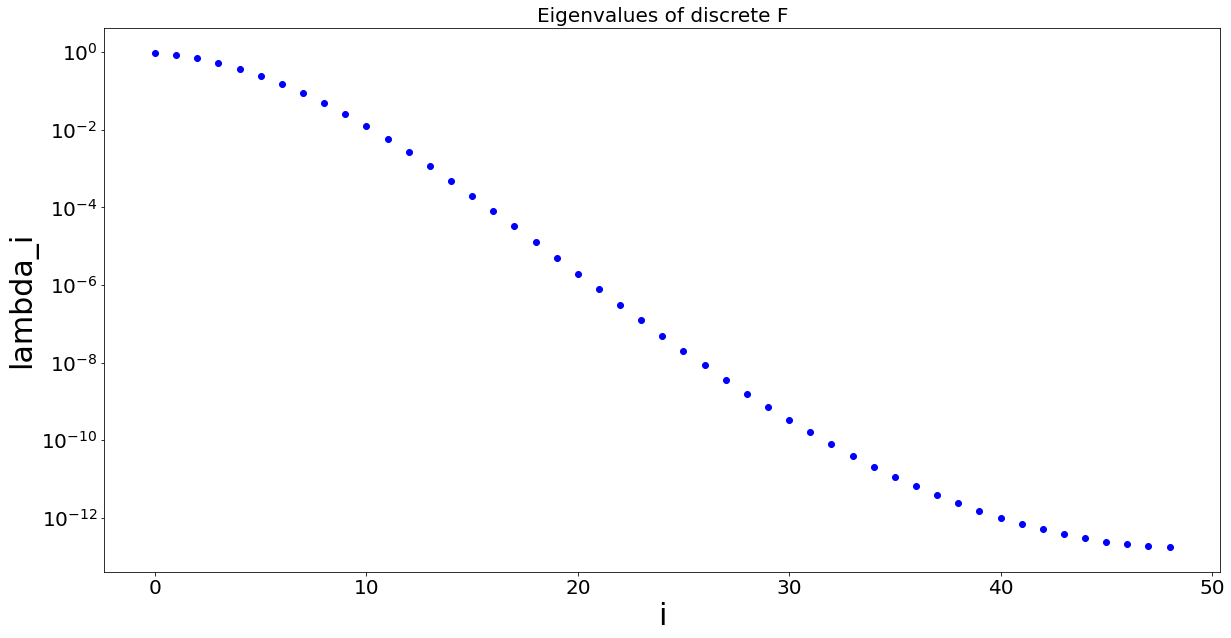

In [10]:
def computeEigendecomposition(k, n, nt):
    h = L/float(nx)
    dt = T/float(nt)
    ## Compute F as a dense matrix
    F = np.zeros((n,n))
    m_i = np.zeros(n)
    
    for i in np.arange(n):
        m_i[i] = 1.0
        F[:,i] = solveFwd(m_i, k, h, dt, n, nt)
        m_i[i] = 0.0
    
    ## solve the eigenvalue problem
    lmbda, U = np.linalg.eigh(F)
    ## sort eigenpairs in decreasing order
    lmbda[:] = lmbda[::-1]
    lmbda[lmbda < 0.] = 0.0
    U[:] = U[:,::-1]
    
    return lmbda, U 

"""
Below you can vary the discretization parameters nx and nt in order to see their effect 
on the spectrum (and compare with the continuous spectrum above)
"""
nx = 50
nt = 50
## Compute eigenvector and eigenvalues of the discretized forward operator
lmbda, U = computeEigendecomposition(k, nx-1, nt)

plt.figure(figsize=(20,10))
plt.semilogy(lmbda, 'ob')
plt.xlabel('i')
plt.ylabel('lambda_i')
plt.title("Eigenvalues of discrete F")
plt.show()

In [11]:
print(lmbda)

[9.61318149e-01 8.54312879e-01 7.02573037e-01 5.35571181e-01
 3.79306359e-01 2.50297095e-01 1.54413463e-01 8.94019426e-02
 4.87840770e-02 2.52030256e-02 1.23865641e-02 5.82007119e-03
 2.62776885e-03 1.14590619e-03 4.85099237e-04 2.00364870e-04
 8.11458664e-05 3.23778680e-05 1.27872256e-05 5.02083409e-06
 1.96825195e-06 7.73442569e-07 3.05812831e-07 1.22095704e-07
 4.93853591e-08 2.02995324e-08 8.50361954e-09 3.63997082e-09
 1.59596991e-09 7.18381125e-10 3.32642653e-10 1.58747319e-10
 7.82133371e-11 3.98450363e-11 2.10182618e-11 1.14947284e-11
 6.52494423e-12 3.84837629e-12 2.36044792e-12 1.50690142e-12
 1.00199257e-12 6.94395272e-13 5.01832788e-13 3.78368032e-13
 2.97725846e-13 2.44613533e-13 2.09902052e-13 1.88123288e-13
 1.76164492e-13]


#### Informed and uninformed modes

The functions $v_i$ ($i=1,2,3, \ldots$) form an orthonormal basis of $L^2([0,1])$. 

That is, every function $f \in L^2([0,1])$ can be written as

$$ f = \sum_{i=1}^\infty \alpha_i v_i, \text{ where } \alpha_i = \int_0^1 f v_i dx.$$

Consider now the noisy problem

$$ d = \mathcal{F}\,m_{\rm true} + \eta, $$

where
- $d$ is the data (observations or measurements, possibly noisy)
- $\eta$ is the noise: $\eta(x) = \sum_{n=1}^\infty \eta_n v_n(x)$
- $m_{\rm true}$ is the true initial temperature field that generated the data
- $\mathcal{F}$ is the parameter-to-observable map

Then, the naive solution to the inverse problem $\mathcal{F}m = d$ is

$$ m = \mathcal{F}^{-1}d = \mathcal{F}^{-1}\left( \mathcal{F}\,m_{\rm true} + \eta \right) = m_{\rm true} + \mathcal{F}^{-1} \eta = m_{\rm true} + \mathcal{F}^{-1} \sum_{i=1}^{\infty} \eta_i v_i = m_{\rm true} +  \sum_{i=1}^{\infty} \frac{\eta_i}{\lambda_i} v_i. $$

If the coefficients $\eta_i = \int_0^1 \eta(x) \, v_i(x) \, dx$ do not decay sufficiently fast with respect to the eigenvalues $\lambda_i$, then the naive solution is unstable.

This implies that oscillatory components cannot be reliably reconstructed from noisy data since they are amplified by the inverses of very small eigenvalues.